In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['file_out2.csv']))

Saving file_out2.csv to file_out2.csv


In [ ]:
df.info

<bound method DataFrame.info of        Unnamed: 0  InvoiceID        Date  ProductID   TotalSales     Discount  \
0               0        328  2019-12-27       1684   796.610169   143.389831   
1               1        329  2019-12-27        524   355.932203    64.067797   
2               2        330  2019-12-27        192   901.694915   162.305085   
3               3        330  2019-12-27        218   182.754237    32.895763   
4               4        330  2019-12-27        247   780.101695   140.418305   
...           ...        ...         ...        ...          ...          ...   
29098       29098      11092  2023-01-13       1644  6573.000000  1183.140000   
29099       29099      11093  2023-01-13        352  5179.728814   932.351186   
29100       29100      11094  2023-01-13        683  7741.423729  1393.456271   
29101       29101      11095  2023-01-14       1830  3644.067797   655.932203   
29102       29102      11096  2023-01-14        351  5813.559322  1046.440678

# VERİ DÜZENLEME

In [ ]:
#Verisetinin index numarasını sildik
df.drop(df.columns[0],axis = 1, inplace = True)

In [ ]:
#satis fiyati 0 olarak gözüken satirlar silindi
df = df.query('TotalSales != 0')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d' )

<ipython-input-6-98ce3e483856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d' )


In [ ]:
df_products = df.groupby('ProductID').count()#Dataframe içinde ki her ürünün kaç adet olduğu
df_products = df_products.iloc[:,0].to_frame()#Pandas serisi bir dataframe e çevrildi - pandas list change to dataframe
df_products.columns = ['SaleCount']#Sütunun ismini SaleCount yaptık - I renamed this column SaleCount
df_products = df_products[df_products['SaleCount']>100]#100 den az satış girişi olan veriyi çıkardım
df_products.head()

SaleCount
ProductID           
49               103
86               138
98               240
152              102
164              136

In [ ]:
df_products['FirstDate'] = df.groupby('ProductID').min()['Date']
df_products['LastDate'] = df.groupby('ProductID').max()['Date']

In [ ]:
df_products.head()

SaleCount  FirstDate   LastDate
ProductID                                 
49               103 2019-03-22 2023-03-01
86               138 2019-01-08 2021-12-17
98               240 2019-01-07 2022-04-08
152              102 2019-01-02 2022-12-10
164              136 2019-04-08 2022-02-28

In [ ]:
df_products['Duration'] = df_products['LastDate'] - df_products['FirstDate']#ilk ve son satış arasında kaç gün olduğunu buldum

In [ ]:
from datetime import timedelta

In [ ]:
df_products = df_products[df_products['Duration']>timedelta(days=300)]#ilk ve son atışı arasında 300 gün olmayan ürünleri tespit ettik (artık satılmayan veya yeni satılmaya başlamış ürünler olabilir diye)

In [ ]:
df_products = df_products[df_products['LastDate']>df['Date'].max() - timedelta(days=90)]#son 3 aydır satışı olmayan verileri eledik çünkü artık satılmıyor olabilir.

In [ ]:
df_demand = df[df['ProductID'].isin(df_products.index)]#kullanışlı ürünlerin ıd numaralarını filtreleyerek sadece o ürünlerin bütün verileriyle bir veriseti oluşturduk

In [ ]:
#adet fiyatı ekleme
df_demand['grain_price'] = df_demand['TotalSales']/df_demand['Quantity']
df_demand.to_csv('df_demand.csv', index=False)

<ipython-input-15-b30e5251fcae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand['grain_price'] = df_demand['TotalSales']/df_demand['Quantity']


In [ ]:
df_demand = df_demand.sort_values('Date')

In [ ]:
df_demand.tail(350)

InvoiceID       Date  ProductID    TotalSales     Discount  CustomerID  \
26410      12424 2022-12-31       1128   7203.389831  1296.610169         197   
26411      12425 2022-12-31       1128   5647.457627  1016.542373         501   
24930      12431 2022-12-31        246    877.423729   157.936271          52   
27824      13584 2023-01-05        885   8809.322034  1585.677966         419   
28242      13589 2023-01-06       1167   1883.898305   339.101695         345   
...          ...        ...        ...           ...          ...         ...   
28692      11569 2023-03-25       1128  25423.728813  4576.271187         481   
28693      11570 2023-03-25       1830  14237.288136  2562.711864         158   
28694      11571 2023-03-25       1341   3389.830508   610.169492          59   
28698      11574 2023-03-25       1830   6762.711864  1217.288136         190   
29023      11575 2023-03-25       1830   7118.644068  1281.355932         185   

       Quantity  grain_price  
26410        10   720.338983  
26411         8   705.932203  
24930         1   877.423729  
27824        12   734.110170  
28242         2   941.949152  
...         ...          ...  
28692        30   847.457627  
28693        16   889.830508  
28694         4   847.457627  
28698         8   845.338983  
29023         8   889.830508  

[350 rows x 8 columns]

# ANALİZ

In [ ]:
monthly_sales = df_demand.groupby(df_demand["Date"].dt.to_period("M"))["TotalSales"].sum()

In [ ]:
monthly_sales.index = monthly_sales.index.to_timestamp()

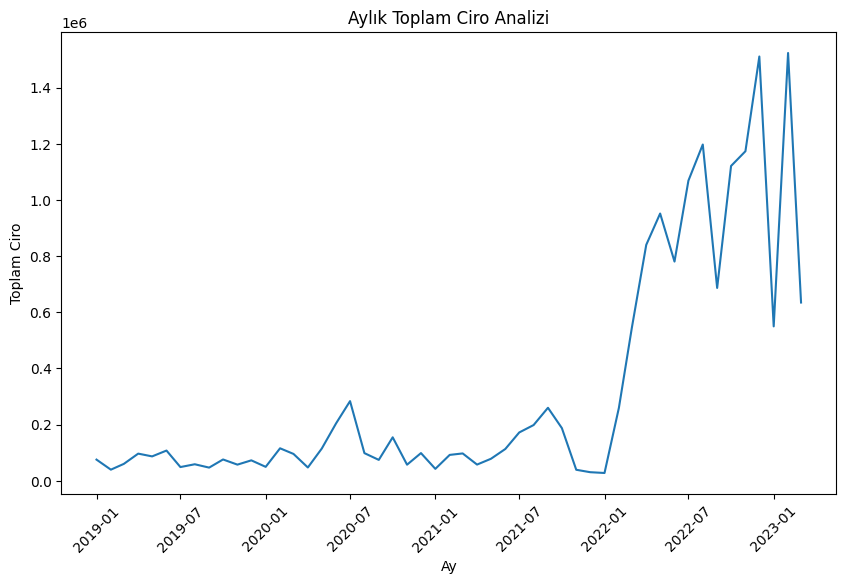

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Ay")
plt.ylabel("Toplam Ciro")
plt.title("Aylık Toplam Ciro Analizi")
plt.xticks(rotation=45)
plt.show()

In [ ]:
year_sales = df_demand.groupby(df_demand["Date"].dt.to_period("Y"))["TotalSales"].sum()

In [ ]:
year_sales

Date
2019    8.285073e+05
2020    1.396241e+06
2021    1.370406e+06
2022    1.016083e+07
2023    2.707233e+06
Freq: A-DEC, Name: TotalSales, dtype: float64

In [ ]:
year_sales.index = year_sales.index.to_timestamp()

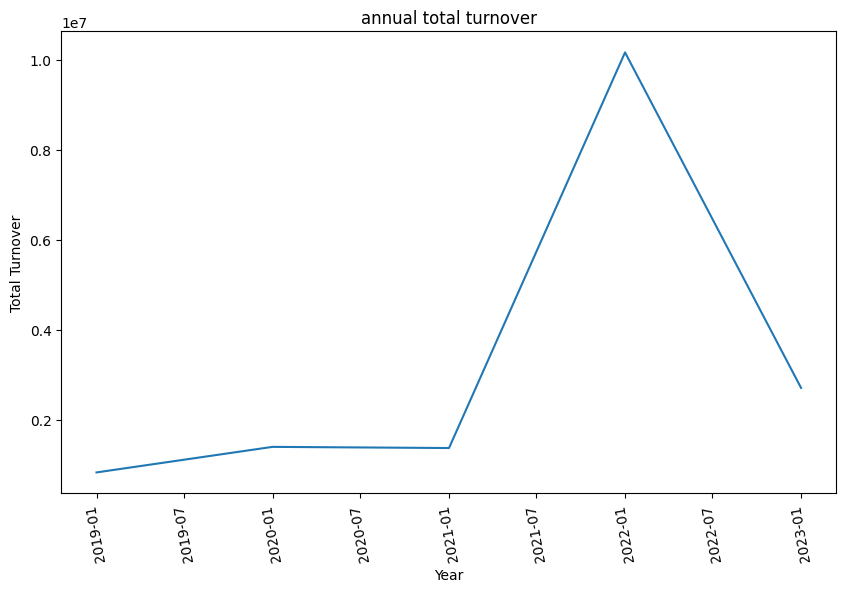

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(year_sales.index, year_sales.values)
plt.xlabel("Year")
plt.ylabel("Total Turnover")
plt.title("annual total turnover")
plt.xticks(rotation=100)
plt.show()

# ÜRÜN SEGMENTASYONU

In [ ]:
product_sales = df_demand.groupby('ProductID')['Quantity'].sum().reset_index()

In [ ]:
average_quantity = product_sales.mean()


In [ ]:
average_quantity

ProductID     924.863636
Quantity     1471.545455
dtype: float64

In [ ]:
product_sales

ProductID  Quantity
0          49       660
1         175       642
2         243       928
3         246       585
4         248      1046
5         252       853
6         300       996
7         486      1090
8         613      2736
9         617      1978
10        885      3523
11       1128      2249
12       1167      1437
13       1241      1413
14       1341      1324
15       1347      2742
16       1475       493
17       1498       908
18       1588      1212
19       1724       850
20       1830      4006
21       1894       703

In [ ]:
product_sales['Group'] = product_sales['Quantity'].apply(lambda x: 1 if x > average_quantity.Quantity else 2)

In [ ]:
product_sales

ProductID  Quantity  Group
0          49       660      2
1         175       642      2
2         243       928      2
3         246       585      2
4         248      1046      2
5         252       853      2
6         300       996      2
7         486      1090      2
8         613      2736      1
9         617      1978      1
10        885      3523      1
11       1128      2249      1
12       1167      1437      2
13       1241      1413      2
14       1341      1324      2
15       1347      2742      1
16       1475       493      2
17       1498       908      2
18       1588      1212      2
19       1724       850      2
20       1830      4006      1
21       1894       703      2

In [ ]:
df_demand['Product_Group'] = df_demand['ProductID'].apply(lambda x: 1 if x in [613, 617, 885, 1128, 1347,1830] else 2)

In [ ]:
df_demand

InvoiceID       Date  ProductID    TotalSales     Discount  CustomerID  \
3606        2662 2019-01-02        252   2898.305085   521.694915          15   
3630        2678 2019-01-02        243    714.237288   128.562712         236   
3620        2671 2019-01-02        248   1830.508475   329.491525         375   
3622        2673 2019-01-02        885    762.711864   137.288136         499   
3624        2673 2019-01-02       1128    796.610169   143.389831         499   
...          ...        ...        ...           ...          ...         ...   
28692      11569 2023-03-25       1128  25423.728813  4576.271187         481   
28693      11570 2023-03-25       1830  14237.288136  2562.711864         158   
28694      11571 2023-03-25       1341   3389.830508   610.169492          59   
28698      11574 2023-03-25       1830   6762.711864  1217.288136         190   
29023      11575 2023-03-25       1830   7118.644068  1281.355932         185   

       Quantity  grain_price  Product_Group  
3606         12   241.525424              2  
3630          4   178.559322              2  
3620          8   228.813559              2  
3622          4   190.677966              1  
3624          4   199.152542              1  
...         ...          ...            ...  
28692        30   847.457627              1  
28693        16   889.830508              1  
28694         4   847.457627              2  
28698         8   845.338983              1  
29023         8   889.830508              1  

[4430 rows x 9 columns]

# BİR ADET ÜRÜN FİYATI İÇİN SÜTUN EKLEME

In [ ]:
df_demand['grain_price'] = df_demand['TotalSales']/df_demand['Quantity']
df_demand.to_csv('df_demand.csv', index=False)

In [ ]:
def calculate_mape(y_true, y_pred):
    n = len(y_true)
    mape = (1 / n) * sum(abs((y_true[i] - y_pred[i]) / y_true[i]) for i in range(n)) * 100
    return mape


# SELECTING MODELS

In [ ]:
df_demand_test=df_demand[df_demand['ProductID'] == 1830]

In [ ]:
df_demand_test["Date"] = pd.to_datetime(df_demand_test["Date"])

<ipython-input-36-682c68ef4019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test["Date"] = pd.to_datetime(df_demand_test["Date"])


In [ ]:
df_demand_test["Year"] = df_demand_test["Date"].dt.year

<ipython-input-37-f321d68bafd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test["Year"] = df_demand_test["Date"].dt.year


In [ ]:
df_demand_test_yedek = df_demand_test

In [ ]:
from sklearn.linear_model import LinearRegression
from datetime import datetime
# Bağımsız değişkenleri ve bağımlı değişkeni ayırın
X = df_demand_test[["Date"]]
y = df_demand_test["Quantity"].values

# Modeli oluşturun ve eğitin
model = LinearRegression()
model.fit(X, y)

# Tahmin yapmak için farklı fiyatlar oluşturun
fiyatlar = [700, 15, 20000, 25, 30]

# Farklı fiyatlar için talep tahmini yapın
for grain_price in fiyatlar:
    tahmin = model.predict([[grain_price]])
    print("Fiyat: {}, Talep Tahmini: {}".format(grain_price, tahmin))

Fiyat: 700, Talep Tahmini: [-89.85564457]
Fiyat: 15, Talep Tahmini: [-89.85564457]
Fiyat: 20000, Talep Tahmini: [-89.85564457]
Fiyat: 25, Talep Tahmini: [-89.85564457]
Fiyat: 30, Talep Tahmini: [-89.85564457]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_demand_test.tail(45)

InvoiceID       Date  ProductID    TotalSales     Discount  CustomerID  \
28041      11313 2023-02-18       1830   3461.864407   623.135593         181   
28013      11306 2023-02-18       1830   3571.186441   642.813559         111   
28063      11333 2023-02-21       1830  10144.067797  1825.932203         269   
28081      11335 2023-02-21       1830   6976.271186  1255.728814         301   
28066      13859 2023-02-21       1830  10677.966102  1922.033898         458   
28084      11338 2023-02-21       1830  25360.169492  4564.830508         420   
28088      11341 2023-02-22       1830   7118.644068  1281.355932          13   
28089      11342 2023-02-22       1830   3559.322034   640.677966          59   
28093      11344 2023-02-22       1830   3488.135593   627.864407         179   
28094      11345 2023-02-22       1830  10677.966102  1922.033898         185   
28073      13863 2023-02-22       1830   1779.661017   320.338983         413   
27849      11348 2023-02-23       1830   6976.271186  1255.728814         301   
28512      13873 2023-02-23       1830  10144.067797  1825.932203         487   
27873      13883 2023-02-24       1830   3381.355932   608.644068         403   
27868      11358 2023-02-24       1830   3559.322034   640.677966         499   
27867      11357 2023-02-24       1830  16906.779661  3043.220339          57   
27864      11356 2023-02-24       1830   6762.711864  1217.288136          57   
27877      13887 2023-02-25       1830  16906.779661  3043.220339         487   
28553      11378 2023-02-27       1830  27905.084746  5022.915254         375   
28527      11372 2023-02-27       1830   3381.355932   608.644068         338   
28536      11374 2023-02-27       1830   3381.355932   608.644068         181   
28541      11375 2023-02-27       1830   7118.644068  1281.355932         415   
28609      13907 2023-02-28       1830   1690.677966   304.322034         403   
28620      11395 2023-02-28       1830   6228.813559  1121.186441         337   
28603      13905 2023-02-28       1830  13810.169492  2485.830508          25   
28587      11391 2023-02-28       1830  17796.610169  3203.389831         197   
28573      13901 2023-02-28       1830   5072.033898   912.966102         403   
28575      13903 2023-02-28       1830   3452.542373   621.457627          25   
28577      11383 2023-02-28       1830  27905.084746  5022.915254         301   
28580      11385 2023-02-28       1830  26161.016949  4708.983051          15   
28637      11408 2023-03-02       1830   2616.101695   470.898305         294   
28642      11411 2023-03-03       1830    889.830508   160.169492         146   
28752      11438 2023-03-08       1830   3381.355932   608.644068         239   
28761      13945 2023-03-09       1830   4098.305085   737.694915         230   
28425      13967 2023-03-13       1830   1811.440678   326.059322         233   
28453      11479 2023-03-13       1830   1690.677966   304.322034         255   
28495      13984 2023-03-15       1830   8453.389831  1521.610169         403   
28493      13982 2023-03-15       1830   7118.644068  1281.355932         458   
28898      11503 2023-03-16       1830   3381.355932   608.644068         255   
28952      11530 2023-03-20       1830   7118.644068  1281.355932         415   
28972      14013 2023-03-22       1830   3622.881356   652.118644         231   
28672      14019 2023-03-23       1830   6976.271186  1255.728814          80   
28693      11570 2023-03-25       1830  14237.288136  2562.711864         158   
28698      11574 2023-03-25       1830   6762.711864  1217.288136         190   
29023      11575 2023-03-25       1830   7118.644068  1281.355932         185   

       Quantity  grain_price  Product_Group  Year  
28041         4   865.466102              1  2023  
28013         4   892.796610              1  2023  
28063        12   845.338983              1  2023  
28081         8   872.033898              1  2023  
28066        12   88

# ARIMA

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df_demand_test.set_index('Date', inplace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA modelini uygulamak için gerekli veri setini seçme
train_data = df_demand_test['2020-01-02':'2021-01-26']  # Eğitim veri seti
test_data = df_demand_test['2021-01-27':'2023-03-25']  # Test veri seti
# Yardımcı değişkenleri seçme
X_train = train_data[['grain_price']]
X_test = test_data[['grain_price']]



In [ ]:
# ARIMA modelini oluşturma ve eğitme
model = ARIMA(train_data['Quantity'], exog=X_train, order=(1, 1, 4))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Tahmin yapma
forecast = model_fit.predict(start=len(X_train), end=len(X_train)+len(test_data)-1, exog=X_test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
print(forecast)

175    5.709934
176    5.199719
177    5.425094
178    5.014155
179    5.331411
         ...   
352    1.403035
353    1.622701
354    1.506651
355    1.796777
356    1.506651
Name: predicted_mean, Length: 182, dtype: float64


In [ ]:
test_data = test_data.reset_index(drop=True)

In [ ]:
ilk_20=test_data.Quantity.head(20).mean()
son_20=test_data.Quantity.tail(20).mean()

In [ ]:
ilk_20_tahmin=forecast[:20]
son_20_tahmin=forecast[:-20]

In [ ]:
ilk_20_tahmin=sum(ilk_20_tahmin) / len(ilk_20_tahmin)
son_20_tahmin=sum(son_20_tahmin) / len(son_20_tahmin)

In [ ]:
test_list=[]
tahmin_list=[]
test_list.append(ilk_20)
test_list.append(son_20)

tahmin_list.append(ilk_20_tahmin)
tahmin_list.append(son_20_tahmin)

In [ ]:
mae = mean_absolute_error(test_list,tahmin_list)

In [ ]:
mae2=mean_absolute_error(test_data.Quantity,forecast)

In [ ]:
print(mae)

5.51139278420003


In [ ]:
print(mae2)

8.120729019454751


In [ ]:
mse = mean_squared_error(test_list, tahmin_list)

In [ ]:
mse2 = mean_squared_error(test_data.Quantity, forecast)

In [ ]:
print(mse)

30.375697443489074


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)

In [ ]:
rmse2 = np.sqrt(mse2)

In [ ]:
print(rmse)

5.511415194257195


In [ ]:
print(rmse2)

13.284184179103242


In [ ]:
print(r2_score(test_list,tahmin_list))

-46.4620272554517


In [ ]:
mape_value = calculate_mape(test_list, tahmin_list)
print("MAPE değeri:", mape_value)

MAPE değeri: 56.04946298061857


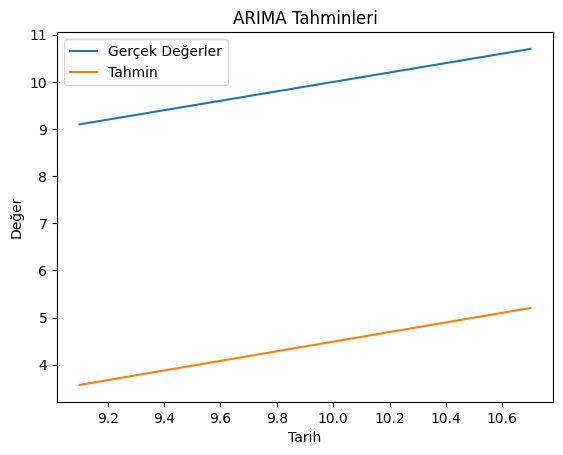

In [ ]:
# Tahmin sonuçlarını görselleştirme
plt.plot(test_list, test_list, label='Gerçek Değerler')
plt.plot(test_list, tahmin_list, label='Tahmin')
plt.xlabel('Tarih')
plt.ylabel('Değer')
plt.title('ARIMA Tahminleri')
plt.legend()
plt.show()

# PROPHET

In [ ]:
!pip install pystan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 625.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
from prophet import Prophet

In [ ]:
train_data2 = df_demand_test['2020-01-02':'2021-01-26']  # Eğitim veri seti
test_data2 = df_demand_test['2021-01-27':'2023-03-25']  # Test veri seti

In [ ]:
test_data2.reset_index(inplace=True)

In [ ]:
train_data2.reset_index(inplace=True)

In [ ]:
train_data2 = train_data2.rename(columns={'Date': 'ds', 'Quantity': 'y'})

In [ ]:
test_data2 = test_data2.rename(columns={'Date': 'ds', 'Quantity': 'y'})

In [ ]:
model = Prophet()

In [ ]:
model.add_regressor('grain_price')

In [ ]:
model.fit(train_data2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ltoxcir/119bjg3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ltoxcir/srpvcnle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87240', 'data', 'file=/tmp/tmp7ltoxcir/119bjg3l.json', 'init=/tmp/tmp7ltoxcir/srpvcnle.json', 'output', 'file=/tmp/tmp7ltoxcir/prophet_modelxollqpxz/prophet_model-20230809120446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(test_data2)

In [ ]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-02-08   6.859110   -2.316233   14.014732     6.859110     6.859110   
1   2021-06-18   7.661099   -1.125916   14.156324     7.661099     7.661099   
2   2021-06-18   7.661099   -1.160286   14.564567     7.661099     7.661099   
3   2021-06-19   7.667268   -1.666701   15.223422     7.667268     7.667268   
4   2021-06-19   7.667268   -0.624408   15.063147     7.667268     7.667269   
..         ...        ...         ...         ...          ...          ...   
177 2023-03-22  11.621691   -2.671843   12.901322    11.621613    11.621774   
178 2023-03-23  11.627860   -4.215942   11.991296    11.627782    11.627944   
179 2023-03-25  11.640199   -2.795429   13.565892    11.640119    11.640284   
180 2023-03-25  11.640199   -3.092994   12.434730    11.640118    11.640284   
181 2023-03-25  11.640199   -3.581193   12.296281    11.640118    11.640285   

     additive_terms  additive_terms_lower  additive_terms_upper  \
0         -1.216784             -1.216784             -1.216784   
1         -0.818189             -0.818189             -0.818189   
2         -0.818189             -0.818189             -0.818189   
3         -0.791251             -0.791251             -0.791251   
4         -0.597747             -0.597747             -0.597747   
..              ...                   ...                   ...   
177       -6.121988             -6.121988             -6.121988   
178       -7.690010             -7.690010             -7.690010   
179       -6.620549             -6.620549             -6.620549   
180       -7.128496             -7.128496             -7.128496   
181       -7.128496             -7.128496             -7.128496   

     extra_regressors_additive  ...  grain_price  grain_price_lower  \
0                    -0.996868  ...    -0.996868          -0.996868   
1                    -0.996868  ...    -0.996868          -0.996868   
2                    -0.996868  ...    -0.996868          -0.996868   
3                    -1.287123  ...    -1.287123          -1.287123   
4                    -1.093620  ...    -1.093620          -1.093620   
..                         ...  ...          ...                ...   
177                  -7.805779  ...    -7.805779          -7.805779   
178                  -7.421190  ...    -7.421190          -7.421190   
179                  -7.116422  ...    -7.116422          -7.116422   
180                  -7.624369  ...    -7.624369          -7.624369   
181                  -7.624369  ...    -7.624369          -7.624369   

     grain_price_upper    weekly  weekly_lower  weekly_upper  \
0            -0.996868 -0.219916     -0.219916     -0.219916   
1            -0.996868  0.178679      0.178679      0.178679   
2            -0.996868  0.178679      0.178679      0.178679   
3            -1.287123  0.495873      0.495873      0.495873   
4            -1.093620  0.495873      0.495873      0.495873   
..                 ...       ...           ...           ...   
177          -7.805779  1.683791      1.683791      1.683791   
178          -7.421190 -0.268820     -0.268820     -0.268820   
179          -7.116422  0.495873      0.495873      0.495873   
180          -7.624369  0.495873      0.495873      0.495873   
181          -7.624369  0.495873      0.495873      0.495873   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
177                   0.0                         0.0   
178                   0.0                         0.0   
179                   0.0                         0.0   
180                   0.0                         0.0   
181      

In [ ]:
test_data2 = test_data2.reset_index(drop=True)

In [ ]:
ilk_20=test_data2.y.head(20).mean()
son_20=test_data2.y.tail(20).mean()

In [ ]:
ilk_20_tahmin=forecast[:20].yhat
son_20_tahmin=forecast[:-20].yhat

In [ ]:
ilk_20_tahmin=sum(ilk_20_tahmin) / len(ilk_20_tahmin)
son_20_tahmin=sum(son_20_tahmin) / len(son_20_tahmin)

In [ ]:
test_list=[]
tahmin_list=[]
test_list.append(ilk_20)
test_list.append(son_20)

tahmin_list.append(ilk_20_tahmin)
tahmin_list.append(son_20_tahmin)

In [ ]:
mae2 = mean_absolute_error(test_list,tahmin_list)

In [ ]:
mae = mean_absolute_error(test_data2.y,forecast.yhat)

In [ ]:
print(mae)

7.200477018759979


In [ ]:
print(mae2)

3.3429161955774847


In [ ]:
mse = mean_squared_error(test_data2.y, forecast.yhat)

In [ ]:
mse2 = mean_squared_error(test_list,tahmin_list)

In [ ]:
print(mse)

147.46360021657335


In [ ]:
print(mse2)

11.21189877518825


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)

In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse2 = np.sqrt(mse2)

In [ ]:
print(rmse)

12.143459153658538


In [ ]:
print(rmse2)

3.348417353793916


In [ ]:
print(r2_score(test_data2.y,forecast.yhat))

-0.22248714178798523


In [ ]:
print(r2_score(test_list,tahmin_list))

-16.51859183623165


In [ ]:
mape_value = calculate_mape(test_list, tahmin_list)
print("MAPE değeri:", mape_value)

MAPE değeri: 33.83114172866847


# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
df_demand_test.reset_index(inplace=True)

In [ ]:
df_demand_test['Date'] = pd.to_datetime(df_demand_test['Date'])

<ipython-input-101-8a099f72d5d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test['Date'] = pd.to_datetime(df_demand_test['Date'])


In [ ]:
df_demand_test['month'] = df_demand_test['Date'].dt.month # Ay bilgisini alın

<ipython-input-102-2aae0eac1498>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test['month'] = df_demand_test['Date'].dt.month # Ay bilgisini alın


In [ ]:
df_demand_test

Date  InvoiceID  ProductID    TotalSales     Discount  CustomerID  \
0   2019-01-07       3220       1830    216.949153    39.050847         267   
1   2019-01-08       3242       1830    915.254237   164.745763         317   
2   2019-01-09       3245       1830    457.627119    82.372881         178   
3   2019-01-14       3321       1830    869.491525   156.508475          15   
4   2019-01-15       3342       1830    457.627119    82.372881         424   
..         ...        ...        ...           ...          ...         ...   
569 2023-03-22      14013       1830   3622.881356   652.118644         231   
570 2023-03-23      14019       1830   6976.271186  1255.728814          80   
571 2023-03-25      11570       1830  14237.288136  2562.711864         158   
572 2023-03-25      11574       1830   6762.711864  1217.288136         190   
573 2023-03-25      11575       1830   7118.644068  1281.355932         185   

     Quantity  grain_price  Product_Group  Year  month  
0           1   216.949153              1  2019      1  
1           4   228.813559              1  2019      1  
2           2   228.813559              1  2019      1  
3           4   217.372881              1  2019      1  
4           2   228.813559              1  2019      1  
..        ...          ...            ...   ...    ...  
569         4   905.720339              1  2023      3  
570         8   872.033898              1  2023      3  
571        16   889.830508              1  2023      3  
572         8   845.338983              1  2023      3  
573         8   889.830508              1  2023      3  

[574 rows x 11 columns]

In [ ]:
features = ['grain_price', 'Year', 'month']
target = 'Quantity'
df_demand_test = df_demand_test[features + [target]]


In [ ]:
train_data = df_demand_test[df_demand_test['Year'] < 2022]
test_data = df_demand_test[df_demand_test['Year'] == 2022]

In [ ]:
# Eğitim ve test veri setlerini özellikler ve hedef değişken olarak ayırın
X_train, y_train = train_data[features].values, train_data[target].values
X_test, y_test = test_data[features].values, test_data[target].values


In [ ]:
# Veri şeklini LSTM modeline uygun hale getirin
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
# LSTM modelini oluşturun
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]))) # Giriş şekli, zaman adımları ve özellik sayısı
model.add(Dense(1)) # Çıkış katmanı

In [ ]:
# Modeli derleyin
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Modeli eğitin
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
14/14 [==============================] - 2s 3ms/step - loss: 68.8241
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 64.2579
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 62.8177
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 61.4814
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 60.1610
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 58.9279
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 57.7362
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 56.5998
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: 55.5015
Epoch 10/10
14/14 [==============================] - 0s 6ms/step - loss: 54.5098


In [ ]:
# Test veri setinde tahmin yapın
y_pred = model.predict(X_test)

3/3 [==============================] - 1s 6ms/step


In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

11.684777635492777


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

307.1899927809216


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)
print(rmse)

17.526836359734794


In [ ]:
print(r2_score(y_test,y_pred))

-0.7778352894934843


In [ ]:
mape_value = calculate_mape(y_test, y_pred)
print("MAPE değeri:", mape_value)

MAPE değeri: [78.882996]


In [ ]:
predictions = pd.DataFrame({'Quantity_Predicted': y_pred.flatten(), 'Quantity_True': y_test})
print(predictions)

    Quantity_Predicted  Quantity_True
0             1.487939              4
1             1.487939              1
2             1.500088              1
3             1.511249             20
4             1.491494              8
..                 ...            ...
71            0.652281              8
72            0.652281              8
73            0.640817              9
74            0.639393              8
75            0.641069             16

[76 rows x 2 columns]


# SARİMAX

In [ ]:
import statsmodels.api as sm

In [ ]:
df_demand_test

grain_price  Year  month  Quantity
0     216.949153  2019      1         1
1     228.813559  2019      1         4
2     228.813559  2019      1         2
3     217.372881  2019      1         4
4     228.813559  2019      1         2
..           ...   ...    ...       ...
569   905.720339  2023      3         4
570   872.033898  2023      3         8
571   889.830508  2023      3        16
572   845.338983  2023      3         8
573   889.830508  2023      3         8

[574 rows x 4 columns]

In [ ]:
# Gerekli sütunları ve hedef değişkeni seçin
features = ['grain_price', 'Year', 'month']
target = 'Quantity'
df_demand_test = df_demand_test[features + [target]]

In [ ]:
# Veriyi eğitim ve test setlerine bölün
train_data = df_demand_test[df_demand_test['Year'] < 2022]
test_data = df_demand_test[df_demand_test['Year'] >= 2022]

In [ ]:
# Eğitim verilerini oluşturun
exog_train = train_data[features]
endog_train = train_data[target]

In [ ]:
# SARIMAX modelini oluşturun
model = sm.tsa.statespace.SARIMAX(endog=endog_train, exog=exog_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

In [ ]:
# Modeli uyarlayın
model_fit = model.fit()

In [ ]:
# Test verilerini oluşturun
exog_test = test_data[features]
endog_test = test_data[target]

In [ ]:
# Tahmin yapın
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=exog_test)

In [ ]:
ilk_10_tahmin=y_pred[:10]
son_7_tahmin=y_pred[10:]

In [ ]:
ilk_10_tahmin=sum(ilk_10_tahmin) / len(ilk_10_tahmin)
son_7_tahmin=sum(son_7_tahmin) / len(son_7_tahmin)

In [ ]:
ilk_10_test=endog_test[:10]
son_7_test=endog_test[10:]

In [ ]:
son_7_test

450     4
451     4
452     8
453    16
454    35
       ..
569     4
570     8
571    16
572     8
573     8
Name: Quantity, Length: 124, dtype: int64

In [ ]:
ilk_10_test=sum(ilk_10_test) / len(ilk_10_test)
son_7_test=sum(son_7_test) / len(son_7_test)

In [ ]:
test_list=[]
tahmin_list=[]
test_list.append(ilk_10_test)
test_list.append(son_7_test)

tahmin_list.append(ilk_10_tahmin)
tahmin_list.append(son_7_tahmin)

In [ ]:
mae = mean_absolute_error(test_list,tahmin_list)

In [ ]:
mae2 = mean_absolute_error(endog_test,y_pred)

In [ ]:
print(mae)

0.6652880582067517


In [ ]:
print(mae2)

9.245086158300149


In [ ]:
mse = mean_squared_error(test_list, tahmin_list)


In [ ]:
mse2 = mean_squared_error(endog_test, y_pred)

In [ ]:
print(mse)

0.505088303643776


In [ ]:
print(mse2)

151.0421912882556


In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)

In [ ]:
# Kök Ortalama Kare Hata (RMSE)
rmse2 = np.sqrt(mse2)

In [ ]:
print(rmse)

0.710695647688781


In [ ]:
print(rmse2)

12.289922346713814


In [ ]:
print(r2_score(test_list,tahmin_list))

-0.19844724460116425


In [ ]:
print(r2_score(endog_test,y_pred))

-0.15684516402751147


In [ ]:
mape_value = calculate_mape(test_list, tahmin_list)
print("MAPE değeri:", mape_value)

MAPE değeri: 6.126988468904708


In [ ]:
# Tahminleri ve gerçek değerleri yazdırın
predictions = pd.DataFrame({'Quantity_Predicted': y_pred, 'Quantity_True': endog_test})
print(predictions)

     Quantity_Predicted  Quantity_True
440            9.167993              4
441            9.426610              1
442            9.288945              1
443            8.968681             20
444           10.638828              8
..                  ...            ...
569           14.699350              4
570           14.239942              8
571           14.482648             16
572           13.875882              8
573           14.482648              8

[134 rows x 2 columns]


# LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df_demand_test_yedek

Date  InvoiceID  ProductID    TotalSales     Discount  CustomerID  \
0   2019-01-07       3220       1830    216.949153    39.050847         267   
1   2019-01-08       3242       1830    915.254237   164.745763         317   
2   2019-01-09       3245       1830    457.627119    82.372881         178   
3   2019-01-14       3321       1830    869.491525   156.508475          15   
4   2019-01-15       3342       1830    457.627119    82.372881         424   
..         ...        ...        ...           ...          ...         ...   
569 2023-03-22      14013       1830   3622.881356   652.118644         231   
570 2023-03-23      14019       1830   6976.271186  1255.728814          80   
571 2023-03-25      11570       1830  14237.288136  2562.711864         158   
572 2023-03-25      11574       1830   6762.711864  1217.288136         190   
573 2023-03-25      11575       1830   7118.644068  1281.355932         185   

     Quantity  grain_price  Product_Group  Year  month  
0           1   216.949153              1  2019      1  
1           4   228.813559              1  2019      1  
2           2   228.813559              1  2019      1  
3           4   217.372881              1  2019      1  
4           2   228.813559              1  2019      1  
..        ...          ...            ...   ...    ...  
569         4   905.720339              1  2023      3  
570         8   872.033898              1  2023      3  
571        16   889.830508              1  2023      3  
572         8   845.338983              1  2023      3  
573         8   889.830508              1  2023      3  

[574 rows x 11 columns]

In [ ]:
X = df_demand_test_yedek[["grain_price", "Date"]]  # "grain_price" ve "Date" sütunlarını kullanıyoruz
y = df_demand_test_yedek["Quantity"]  # "quantity" sütunu hedef değişkenimizdir

# Tarih sütununu datetime veri türüne dönüştürün
X["Date"] = pd.to_datetime(X["Date"])
X["Year"] = X["Date"].dt.year
X["Month"] = X["Date"].dt.month
X.drop("Date", axis=1, inplace=True)

# Eğitim ve test verilerini bölmek için kullanın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-151-614998e16819>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Date"] = pd.to_datetime(X["Date"])
<ipython-input-151-614998e16819>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Year"] = X["Date"].dt.year
<ipython-input-151-614998e16819>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
# LightGBM için veri kümesini hazırlayın
train_data = lgb.Dataset(X_train, label=y_train)

# LightGBM parametrelerini ayarlayın
params = {
    "objective": "regression",  # Regresyon problemi için kullanıyoruz
    "metric": "rmse",  # Hata ölçüsü olarak root mean squared error (RMSE) kullanıyoruz
    "num_leaves": 31,  # Ağaç yapraklarındaki düğüm sayısı
    "learning_rate": 0.05,  # Öğrenme oranı
    "feature_fraction": 0.9,  # Özelliklerin rastgele bir bölümünü kullanma oranı
    "bagging_fraction": 0.8,  # Rastgele örnekleme yapma oranı
    "bagging_freq": 5,  # Rastgele örnekleme frekansı
    "num_threads": 2  # İşlemci çekirdek sayısı
}

In [ ]:
# LightGBM modelini eğitin
model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 3
[LightGBM] [Info] Start training from score 7.291939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
# Modeli test verisiyle değerlendirin
y_pred = model.predict(X_test)

In [ ]:
ilk_20_tahmin=y_pred[:20]
son_20_tahmin=y_pred[:-20]

In [ ]:
ilk_20_test=y_test[:20]
son_20_test=y_test[:-20]

In [ ]:
ilk_20_tahmin=sum(ilk_20_tahmin) / len(ilk_20_tahmin)
son_20_tahmin=sum(son_20_tahmin) / len(son_20_tahmin)

In [ ]:
ilk_20_test=sum(ilk_20_test) / len(ilk_20_test)
son_20_test=sum(son_20_test) / len(son_20_test)

In [ ]:
test_list=[]
tahmin_list=[]
test_list.append(ilk_20_test)
test_list.append(son_20_test)

tahmin_list.append(ilk_20_tahmin)
tahmin_list.append(son_20_tahmin)

In [ ]:
mae = mean_absolute_error(test_list,tahmin_list)

In [ ]:
mae2 = mean_absolute_error(y_test, y_pred)

In [ ]:
print( mae)
print( mae2)

1.2964994231858578
3.2914846593548472


In [ ]:
mse = mean_squared_error(test_list, tahmin_list)
mse2 = mean_squared_error(y_test, y_pred)

In [ ]:
print( mse)
print( mse2)

2.269470438225699
36.05483339999805


In [ ]:
rmse = mean_squared_error(test_list, tahmin_list)

In [ ]:
rmse2 = mean_squared_error(y_test, y_pred)

In [ ]:
print( rmse)
print( rmse2)

2.269470438225699
36.05483339999805


In [ ]:
print(r2_score(y_test,y_pred))

-0.013607238820668721


In [ ]:
print(r2_score(test_list,tahmin_list))

-12.818162054300501


In [ ]:
mape_value = calculate_mape(test_list, tahmin_list)
print("MAPE değeri:", mape_value)

MAPE değeri: 25.191621253286336


# AUTO ARIMA

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

grain_price  Year  Month
411   305.932204  2021      8
546   845.338983  2023      2
186   224.576271  2019     10
184   249.898305  2019     10
557   872.033898  2023      2
..           ...   ...    ...
179   247.677966  2019      9
293   233.050848  2020      7
503   567.796610  2022      4
414   322.033898  2021      8
332   241.525424  2020      8

[459 rows x 3 columns]

In [ ]:
model = pm.auto_arima(y_train, exogenous=X_train[["grain_price"]], seasonal=True, m=12)

In [ ]:
y_pred = model.predict(n_periods=len(y_test), exogenous=X_test[["grain_price"]])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
ilk_20_tahmin=y_pred[:20]
son_20_tahmin=y_pred[:-20]

In [ ]:
ilk_20_test=y_test[:20]
son_20_test=y_test[:-20]

In [ ]:
ilk_20_tahmin=sum(ilk_20_tahmin) / len(ilk_20_tahmin)
son_20_tahmin=sum(son_20_tahmin) / len(son_20_tahmin)

In [ ]:
ilk_20_test=sum(ilk_20_test) / len(ilk_20_test)
son_20_test=sum(son_20_test) / len(son_20_test)

In [ ]:
test_list=[]
tahmin_list=[]
test_list.append(ilk_20_test)
test_list.append(son_20_test)

tahmin_list.append(ilk_20_tahmin)
tahmin_list.append(son_20_tahmin)

In [ ]:
mae = mean_absolute_error(test_list,tahmin_list)
mae2 = mean_absolute_error(y_test, y_pred)

In [ ]:
print( mae)
print( mae2)

1.3690846343672294
4.627318015956352


In [ ]:
mse = mean_squared_error(test_list, tahmin_list)
mse2 = mean_squared_error(y_test, y_pred)

In [ ]:
print( mse)
print( mse2)

1.8770992859482918
39.931569040400994


In [ ]:
rmse = mean_squared_error(test_list, tahmin_list)
rmse2 = mean_squared_error(y_test, y_pred)

In [ ]:
print( rmse)
print( rmse2)

1.8770992859482918
39.931569040400994


In [ ]:
print(r2_score(y_test,y_pred))
print(r2_score(test_list,tahmin_list))

-0.038240892567892315
-384.9781230201977


In [ ]:
mape_value = calculate_mape(test_list, tahmin_list)
print("MAPE değeri:", mape_value)

MAPE değeri: 23.296479304222288


# SELECTED MODELS

In [ ]:
urun_id_listesi = set()

# DataFrame üzerinde döngü başlat ve her satırdaki ürün ID'sini listeye ekle
for index, row in df_demand.iterrows():
    urun_id_listesi.add(row['ProductID'])  # 'urun_id' sütun adını veri kümenize göre değiştirmelisiniz

# Elde edilen ürün ID setini liste haline dönüştürüyoruz ve yazdırıyoruz
urun_id_listesi = list(urun_id_listesi)
print(urun_id_listesi)

[1167, 1830, 300, 175, 49, 1588, 1724, 1341, 1475, 1347, 1241, 1498, 613, 486, 1894, 1128, 617, 243, 885, 246, 248, 252]


In [ ]:
urun_kumesi = pd.DataFrame(urun_id_listesi)

In [ ]:
urun_kumesi

0
0   1167
1   1830
2    300
3    175
4     49
5   1588
6   1724
7   1341
8   1475
9   1347
10  1241
11  1498
12   613
13   486
14  1894
15  1128
16   617
17   243
18   885
19   246
20   248
21   252

In [ ]:
def find_root(target_value):
    x = 220.0
    step_size = 20.35
    max_iterations = 3000
    iteration = 0

    while iteration < max_iterations:
        current_value = ((model.predict(n_periods=1, exogenous=x)) * x)
        #print(current_value)

        if (current_value - target_value) >= 0:
            return x


        x += step_size
        iteration += 1



In [ ]:
df_demand_test=df_demand[df_demand['ProductID'] == 1830]
X = df_demand_test[["grain_price", "Date"]]
y = df_demand_test["Quantity"]
X["Date"] = pd.to_datetime(df_demand_test["Date"])
X["Year"] = df_demand_test["Date"].dt.year
X.set_index('Date', inplace=True)
model = pm.auto_arima(y, exogenous=X[["grain_price"]], seasonal=True, m=12)

<ipython-input-194-604b984cae7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Date"] = pd.to_datetime(df_demand_test["Date"])
<ipython-input-194-604b984cae7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Year"] = df_demand_test["Date"].dt.year


In [ ]:
df_demand_test=df_demand[df_demand['ProductID'] == 252]
df_demand_test['Date'] = pd.to_datetime(df_demand_test['Date'])
df_demand_test["Year"] = df_demand_test["Date"].dt.year
df_demand_test['month'] = df_demand_test['Date'].dt.month # Ay bilgisini alın
features = ['grain_price', 'Year', 'month']
target = 'Quantity'
df_demand_test = df_demand_test[features + [target]]
# Eğitim verilerini oluşturun
exog_train = df_demand_test[features]
endog_train = df_demand_test[target]
model = sm.tsa.statespace.SARIMAX(endog=endog_train, exog=exog_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()


<ipython-input-205-095bcdda1848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test['Date'] = pd.to_datetime(df_demand_test['Date'])
<ipython-input-205-095bcdda1848>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test["Year"] = df_demand_test["Date"].dt.year
<ipython-input-205-095bcdda1848>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
exog_train

grain_price  Year  month
3606    241.525424  2019      1
3633    254.237288  2019      1
4655    241.525424  2019      1
4697    229.449152  2019      1
4769    241.525424  2019      1
...            ...   ...    ...
29026   764.830508  2023      1
28314  1069.703390  2023      2
28869  1092.372881  2023      2
28499  1112.703390  2023      3
28668  1171.271187  2023      3

[203 rows x 3 columns]

In [ ]:
data_test = pd.DataFrame({
    'grain_price': [100],
    'Year': [2024],
    'month': [1]
})

In [ ]:
y_pred = model_fit.predict(start=len(df_demand_test), end=len(df_demand_test) + len(data_test) - 1, exog=data_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
urun_fiyat=[]
for urun_id in urun_id_listesi:
  df_demand_test=df_demand[df_demand['ProductID'] == urun_id]
  df_demand_test_yedek=df_demand_test
  df_demand_test['Date'] = pd.to_datetime(df_demand_test['Date'])
  df_demand_test["Year"] = df_demand_test["Date"].dt.year
  df_demand_test['month'] = df_demand_test['Date'].dt.month # Ay bilgisini alın
  features = ['grain_price', 'Year', 'month']
  target = 'Quantity'
  df_demand_test = df_demand_test[features + [target]]
  # Eğitim verilerini oluşturun
  exog_train = df_demand_test[features]
  endog_train = df_demand_test[target]
  model = sm.tsa.statespace.SARIMAX(endog=endog_train, exog=exog_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
  model_fit = model.fit()
  #goal_seeking
  selected_data = df_demand_test_yedek[df_demand_test_yedek['Year'] == 2023]
  target_value = (selected_data['TotalSales'].mean())+((selected_data['TotalSales'].mean()*20/100))
  #result = find_root(target_value)
  x = 100.0
  step_size = 8.35
  max_iterations = 3000
  iteration = 0
  while iteration < max_iterations:

        data_test = pd.DataFrame({
        'grain_price': [x],
        'Year': [2024],
        'month': [1]
         })
        current_value = (model_fit.predict(start=len(df_demand_test), end=len(df_demand_test) + len(data_test) - 1, exog=data_test) * x)
        current_value=current_value.mean()
        #print(current_value)

        if ((current_value - target_value) >= 0.0):
            result= x
            break


        x += step_size
        iteration += 1
  urun_fiyat.append(result)
  print(result)

<ipython-input-219-76fd9b370b96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test['Date'] = pd.to_datetime(df_demand_test['Date'])
<ipython-input-219-76fd9b370b96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test["Year"] = df_demand_test["Date"].dt.year
<ipython-input-219-76fd9b370b96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

1127.0500000000009


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

926.6500000000017


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

133.39999999999998


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

667.800000000001


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

726.2500000000011


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

584.3000000000008


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

609.3500000000008


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1202.2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:83

976.7500000000018


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

868.2000000000015


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1243.9499999999996


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

141.74999999999997


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

141.74999999999997


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

726.2500000000011


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1076.9500000000014


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

918.3000000000017


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

392.2500000000003


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

392.2500000000003


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

843.1500000000015


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:83

208.54999999999993


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

208.54999999999993


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1319.0999999999988


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

In [ ]:
urun_fiyat

[1127.0500000000009,
 926.6500000000017,
 133.39999999999998,
 667.800000000001,
 726.2500000000011,
 584.3000000000008,
 609.3500000000008,
 1202.2,
 976.7500000000018,
 868.2000000000015,
 1243.9499999999996,
 141.74999999999997,
 141.74999999999997,
 726.2500000000011,
 1076.9500000000014,
 918.3000000000017,
 392.2500000000003,
 392.2500000000003,
 843.1500000000015,
 208.54999999999993,
 208.54999999999993,
 1319.0999999999988]

In [ ]:
urun_kumesi['fiyat'] = urun_fiyat

In [ ]:
urun_kumesi.columns = ['urun_id', 'fiyat']

In [ ]:
print("SARİMAX:Asagida urun id numaraları ve verilen id numarasına ait urunun %20 ciro artışını sağlayacak fiyati verilmiştir ")
urun_kumesi

SARİMAX:Asagida urun id numaraları ve verilen id numarasına ait urunun %20 ciro artışını sağlayacak fiyati verilmiştir 


urun_id    fiyat
0      1167  1127.05
1      1830   926.65
2       300   133.40
3       175   667.80
4        49   726.25
5      1588   584.30
6      1724   609.35
7      1341  1202.20
8      1475   976.75
9      1347   868.20
10     1241  1243.95
11     1498   141.75
12      613   141.75
13      486   726.25
14     1894  1076.95
15     1128   918.30
16      617   392.25
17      243   392.25
18      885   843.15
19      246   208.55
20      248   208.55
21      252  1319.10

In [ ]:
urun_fiyat=[]
for urun_id in urun_id_listesi:
  df_demand_test=df_demand[df_demand['ProductID'] == urun_id]
  df_demand_test["Year"] = df_demand_test["Date"].dt.year
  X = df_demand_test[["grain_price", "Date"]]
  y = df_demand_test["Quantity"]
  X["Date"] = pd.to_datetime(df_demand_test["Date"])
  X["Year"] = df_demand_test["Date"].dt.year
  X.set_index('Date', inplace=True)
  model = pm.auto_arima(y, exogenous=X[["grain_price"]], seasonal=True, m=12)
  #goal_seeking
  selected_data = df_demand_test[df_demand_test['Year'] == 2023]
  target_value = (selected_data['TotalSales'].mean())+((selected_data['TotalSales'].mean()*20/100))
  #result = find_root(target_value)
  x = 100.0
  step_size = 8.35
  max_iterations = 3000
  iteration = 0
  while iteration < max_iterations:
        current_value = ((model.predict(n_periods=1, exogenous=x)) * x)
        current_value=current_value.mean()
        #print(current_value)

        if ((current_value - target_value) >= 0.0):
            result= x
            break


        x += step_size
        iteration += 1
  urun_fiyat.append(result)
  print(result)



<ipython-input-195-f4b665c7f79e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand_test["Year"] = df_demand_test["Date"].dt.year
<ipython-input-195-f4b665c7f79e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Date"] = pd.to_datetime(df_demand_test["Date"])
<ipython-input-195-f4b665c7f79e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

1252.2999999999995


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

985.1000000000018


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

133.39999999999998


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

559.2500000000007


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

484.10000000000053


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

642.7500000000009


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1010.1500000000019


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1051.9000000000017


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1202.2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1435.9999999999975


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1110.350000000001


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-195-f4b665c7f79e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

116.69999999999999


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

759.6500000000012


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

784.7000000000013


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

918.3000000000017


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1235.5999999999997


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1001.8000000000019


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

851.5000000000015


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

851.5000000000015


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

216.89999999999992


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

216.89999999999992


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

1319.0999999999988


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

In [ ]:
urun_fiyat

[1252.2999999999995,
 985.1000000000018,
 133.39999999999998,
 559.2500000000007,
 484.10000000000053,
 642.7500000000009,
 1010.1500000000019,
 1051.9000000000017,
 1202.2,
 1435.9999999999975,
 1110.350000000001,
 116.69999999999999,
 759.6500000000012,
 784.7000000000013,
 918.3000000000017,
 1235.5999999999997,
 1001.8000000000019,
 851.5000000000015,
 851.5000000000015,
 216.89999999999992,
 216.89999999999992,
 1319.0999999999988]

In [ ]:
urun_kumesi['fiyat'] = urun_fiyat

In [ ]:
urun_kumesi.columns = ['urun_id', 'fiyat']

In [ ]:
print("AUTO_ARIMA:Asagida urun id numaraları ve verilen id numarasına ait urunun %20 ciro artışını sağlayacak fiyati verilmiştir ")
urun_kumesi

AUTO_ARIMA:Asagida urun id numaraları ve verilen id numarasına ait urunun %20 ciro artışını sağlayacak fiyati verilmiştir 


urun_id    fiyat
0      1167  1252.30
1      1830   985.10
2       300   133.40
3       175   559.25
4        49   484.10
5      1588   642.75
6      1724  1010.15
7      1341  1051.90
8      1475  1202.20
9      1347  1436.00
10     1241  1110.35
11     1498   116.70
12      613   759.65
13      486   784.70
14     1894   918.30
15     1128  1235.60
16      617  1001.80
17      243   851.50
18      885   851.50
19      246   216.90
20      248   216.90
21      252  1319.10